### 3. 尝试不同optimizer对模型进行训练，观察对比loss结果。

In [24]:
# 导包
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
from torch_nn import TorchNN
from simple_net import SimpleNet
from dropout_net import DropoutNet

In [25]:
# 初始化参数
lr = 0.01
epochs = 100

In [26]:
# 加载 Olivetti Faces 数据集
X, y = fetch_olivetti_faces(data_home="./fdata", return_X_y=True)
print("数据集中图像的维度", X.shape) # (400, 64*64)
print("数据集中图像的数量：", len(X)) # 400
print("数据集中目标标签的数量：", len(y)) # 400

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) 

# 转换为 PyTorch 的 Tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
# 训练集 320张64*64照片 输出320个对应的标签项
print(X_train_tensor.shape)
print(y_train_tensor.shape)
# 测试集 80张64*64照片 输出80个对应的标签项
print(X_test_tensor.shape)
print(y_test_tensor.shape)

# 创建数据集和数据加载器
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

数据集中图像的维度 (400, 4096)
数据集中图像的数量： 400
数据集中目标标签的数量： 400
torch.Size([320, 4096])
torch.Size([320])
torch.Size([80, 4096])
torch.Size([80])


In [27]:
# 定义迭代训练函数
def train_iter(model, epochs, train_loader, optimizer):
    loss_hist_list = []
    loss_fn = nn.CrossEntropyLoss()
    for epoch in range(epochs):
        for images, label in train_loader:
            y_hat = model(images)
            # print(y_hat.shape) (320, 40)
            loss = loss_fn(y_hat, label)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f"epoch: {epoch}, loss: {loss.item()}")
        loss_hist_list.append(loss.item())
    return loss_hist_list
        

In [29]:
# 定义测试验证函数
def test_train(model, test_loader):
    total = 0
    correct = 0
    with torch.no_grad():
        for images, label in test_loader:
            y_hat = model(images)
            max_val, max_idx = torch.max(y_hat, dim=1)
            total += y_hat.size(0)
            correct += (max_idx == label).sum().item()
        print(f"total: {total}, correct: {correct}")
    return correct/total * 100

In [30]:
# 定义损失梯度图像函数
def draw_loss_hist(loss_his_list):
    plt.plot(loss_his_list)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Model')
    plt.show()

In [31]:
model1 = TorchNN()
model2 = TorchNN()
model3 = TorchNN()
model4 = TorchNN()

In [32]:
# 使用自定义的optimizer
optim1 = torch.optim.SGD(model1.parameters(), lr)
optim2 = torch.optim.RMSprop(model2.parameters(), lr)
optim3 = torch.optim.Adam(model3.parameters(), lr)
optim4 = torch.optim.AdamW(model4.parameters(), lr)

In [33]:
# 训练模型
loss_his_list1 = train_iter(model1, epochs, train_loader, optim1)
loss_his_list2 = train_iter(model2, epochs, train_loader, optim2)
loss_his_list3 = train_iter(model3, epochs, train_loader, optim3)
loss_his_list4 = train_iter(model4, epochs, train_loader, optim4)

epoch: 0, loss: 3.70029616355896
epoch: 1, loss: 3.6895511150360107
epoch: 2, loss: 3.6839561462402344
epoch: 3, loss: 3.691890239715576
epoch: 4, loss: 3.6727631092071533
epoch: 5, loss: 3.6562767028808594
epoch: 6, loss: 3.635223865509033
epoch: 7, loss: 3.6669576168060303


KeyboardInterrupt: 

C:\Users\uchonor\AppData\Local\Temp\ipykernel_9416\1702349182.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


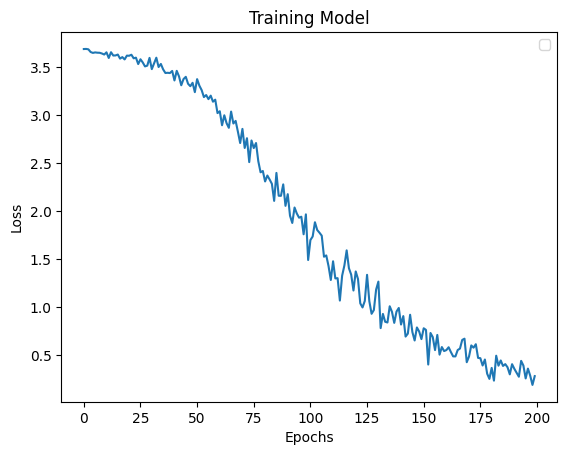

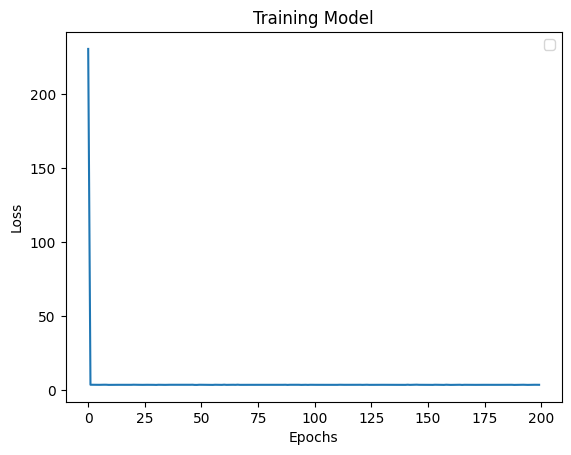

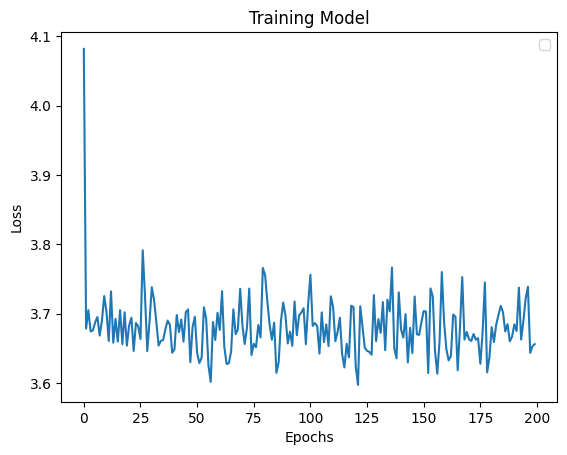

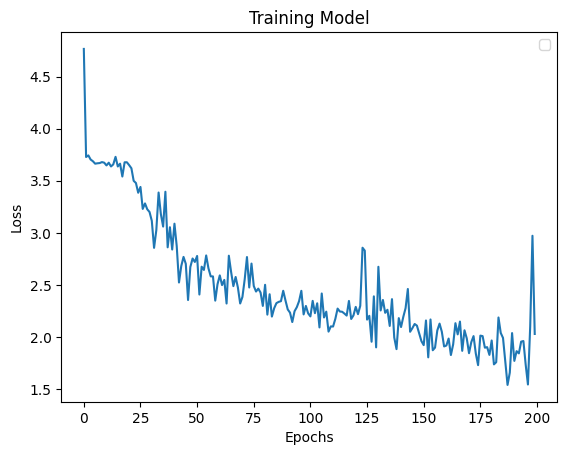

In [21]:
# 绘制损失梯度图像
draw_loss_hist(loss_his_list1)
draw_loss_hist(loss_his_list2)
draw_loss_hist(loss_his_list3)
draw_loss_hist(loss_his_list4)

In [22]:
# 测试模型
accuracy1 = test_train(model1, test_loader)
print(f"模型1-在测试集上的准确率: {accuracy1:.2f}%")

accuracy2 = test_train(model2, test_loader) 
print(f"模型2-在测试集上的准确率: {accuracy2:.2f}%")

accuracy3 = test_train(model3, test_loader)
print(f"模型3-在测试集上的准确率: {accuracy3:.2f}%")

accuracy4 = test_train(model4, test_loader)
print(f"模型4-在测试集上的准确率: {accuracy4:.2f}%")

total: 80, correct: 1
模型1-在测试集上的准确率: 1.25%
total: 80, correct: 1
模型2-在测试集上的准确率: 1.25%
total: 80, correct: 2
模型3-在测试集上的准确率: 2.50%
total: 80, correct: 0
模型4-在测试集上的准确率: 0.00%
